In [1]:
%matplotlib widget
from solver import *

from models import NPN, PNP, Diode, Resistor, VoltageSource, CurrentSource, OpAmp, Capacitor, Inductor
import sympy as sp

In [2]:
Vcc = 5

var = sp.Symbol("Vin", real=True)

In [3]:
acTest = Solver.Circuit("acTest")
acTest.element(
                    VoltageSource("Vg", {"V+" : "V1", "V-" : Gnd}, V = 2 / s**2),
                    Diode("D1", {"Vp" : "V1", "Vn" : "V2"}),
                    Resistor("R1", {"V1" : "V2", "V2" : "Vc"}, R = 1e5),
                    Resistor("Rout", {"V1" : "Vc", "V2" : Gnd}, R = 1e7),
                    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, V0 = 0),
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'V1', 'V-': 0}, 'values': {'Vdc': 0, 'Vac': 0, 'V_s': 0, 'V': 2/s**2}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'V1', 'Vn': 'V2'}, 'values': {'Vd': 0.6, 'T': 300}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'V2', 'V2': 'Vc'}, 'values': {'R': 100000.0}},
 'Rout': {'name': 'Rout', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'R': 10000000.0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-06, 'V0': 0}}}

In [4]:
multivibrator = Solver.Circuit("multivibrator")
multivibrator.element(
    Resistor("R", {"V1" : "Vc", "V2" : "Vout"}, R = 50e3),
    OpAmp("Op1", {"V+" : "V+", "V-" : "Vc", "Vop" : "Vout", "Vcc" : Vcc, "Vee" : -Vcc}),
    Resistor("R1", {"V1" : "Vout", "V2" : "V+"}, R = 35e3),
    Resistor("R2", {"V1" : "V+", "V2" : Gnd}, R = 30e3),
    Capacitor("C1", {"V1" : "Vc", "V2" : Gnd}, C = 10e-9, V0 = 2.5),
)

{'R': {'name': 'R', 'type': 'Resistor', 'nodes': {'V1': 'Vc', 'V2': 'Vout'}, 'values': {'R': 50000.0}},
 'Op1': {'name': 'Op1', 'type': 'OpAmp', 'nodes': {'V+': 'V+', 'V-': 'Vc', 'Vop': 'Vout', 'Vcc': 5, 'Vee': -5}, 'values': {'Av': oo}},
 'R1': {'name': 'R1', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 'V+'}, 'values': {'R': 35000.0}},
 'R2': {'name': 'R2', 'type': 'Resistor', 'nodes': {'V1': 'V+', 'V2': 0}, 'values': {'R': 30000.0}},
 'C1': {'name': 'C1', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 0}, 'values': {'C': 1e-08, 'V0': 2.5}}}

In [5]:
opTest = Solver.Circuit("opTest")
opTest.element(
    
    Resistor("Rc", {"V1" : Vcc, "V2" : "Vc"}, R = 1e3),
    
    Capacitor("Cout", {"V1" : "Vc", "V2" : "Vout"}),
    Resistor("Rout", {"V1" : "Vout", "V2" : Gnd}, R = 1e3),
    
    NPN("Q1", {"Vc" : "Vc", "Vb" : "Vb", "Ve" : Gnd}),
    
    VoltageSource("Vbb", {"V+" : "Vbb", "V-" : Gnd}, Vdc = 1.6),
    Resistor("Rb", {"V1" : "Vbb", "V2" : "Vb"}, R = 31.2e3),
    
    Capacitor("Cin", {"V1" : "Vg", "V2" : "Vb"}),
    Resistor("Rg", {"V1" : "Vin", "V2" : "Vg"}, R = 1e3),
    VoltageSource("Vg", {"V+" : "Vin", "V-" : Gnd}, Vac = var),
)

{'Rc': {'name': 'Rc', 'type': 'Resistor', 'nodes': {'V1': 5, 'V2': 'Vc'}, 'values': {'R': 1000.0}},
 'Cout': {'name': 'Cout', 'type': 'Capacitor', 'nodes': {'V1': 'Vc', 'V2': 'Vout'}, 'values': {'C': 1e-06, 'V0': 0}},
 'Rout': {'name': 'Rout', 'type': 'Resistor', 'nodes': {'V1': 'Vout', 'V2': 0}, 'values': {'R': 1000.0}},
 'Q1': {'name': 'Q1', 'type': 'NPN', 'nodes': {'Vc': 'Vc', 'Vb': 'Vb', 'Ve': 0}, 'values': {'Vdf': 0.6, 'Vdr': 0.4, 'Bf': 100, 'Br': 0.1}},
 'Vbb': {'name': 'Vbb', 'type': 'VoltageSource', 'nodes': {'V+': 'Vbb', 'V-': 0}, 'values': {'Vdc': 1.6, 'Vac': 0, 'V_s': 0}},
 'Rb': {'name': 'Rb', 'type': 'Resistor', 'nodes': {'V1': 'Vbb', 'V2': 'Vb'}, 'values': {'R': 31200.0}},
 'Cin': {'name': 'Cin', 'type': 'Capacitor', 'nodes': {'V1': 'Vg', 'V2': 'Vb'}, 'values': {'C': 1e-06, 'V0': 0}},
 'Rg': {'name': 'Rg', 'type': 'Resistor', 'nodes': {'V1': 'Vin', 'V2': 'Vg'}, 'values': {'R': 1000.0}},
 'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'value

In [6]:
smallSignalTest = Solver.Circuit("smallSignalTest")
smallSignalTest.element(
    VoltageSource("Vg", {"V+" : "Vin", "V-" : Gnd}, Vdc = 2, Vac = var),
    Resistor("Rg", {"V1" : "Vin", "V2" : "Vd"}, R = 1e3),
    Diode("D1", {"Vp" : "Vd", "Vn" : Gnd}),
)

{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 2, 'Vac': Vin, 'V_s': 0}},
 'Rg': {'name': 'Rg', 'type': 'Resistor', 'nodes': {'V1': 'Vin', 'V2': 'Vd'}, 'values': {'R': 1000.0}},
 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'Vd', 'Vn': 0}, 'values': {'Vd': 0.6, 'T': 300}}}

In [7]:
Solver.setMain("smallSignalTest")
compiled = Solver.compile()

In [8]:
model = Solver.solveSmallSignal(compiled, debugLog = True)

{I2_1, I0_1, V0, I0_0, V1, I1_0, I1_1, I2_0}
[Eq(I0_0 + I1_0, 0), Eq(I1_1 + I2_0, 0)]
{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc': 2, 'Vac': Vin, 'V_s': 0}}, 'Rg': {'name': 'Rg', 'type': 'Resistor', 'nodes': {'V1': 'Vin', 'V2': 'Vd'}, 'values': {'R': 1000.0}}, 'D1': {'name': 'D1', 'type': 'Diode', 'nodes': {'Vp': 'Vd', 'Vn': 0}, 'values': {'Vd': 0.6, 'T': 300}}}
{'Vg': {'V+': V0, 'V-': 0}, 'Rg': {'V1': V0, 'V2': V1}, 'D1': {'Vp': V1, 'Vn': 0}}
{'Vg': {'V+': I0_0, 'V-': I0_1}, 'Rg': {'V1': I1_0, 'V2': I1_1}, 'D1': {'Vp': I2_0, 'Vn': I2_1}}
***************************************
[False]
[True]
{I0_0: -0.00140000000000000, I0_1: 0.00140000000000000, I1_0: 0.00140000000000000, I1_1: -0.00140000000000000, I2_0: 0.00140000000000000, I2_1: -0.00140000000000000, V0: 2.00000000000000, V1: 0.600000000000000} {('D1', 'Fwd'), ('Vg', ''), ('Rg', '')}
{'Vg': {'name': 'Vg', 'type': 'VoltageSource', 'nodes': {'V+': 'Vin', 'V-': 0}, 'values': {'Vdc'

In [9]:
printModel(model, var=var)

{('D1', 'Fwd'), ('Vg', ''), ('Rg', '')}
Vin ∈ Interval.open(-33.0926507408876, oo)
{I0_0: -0.000981869086139459*Vin, I0_1: 0.000981869086139459*Vin, I1_0: 0.000981869086139459*Vin, I1_1: -0.000981869086139459*Vin, I2_0: 0.000981869086139459*Vin, I2_1: -0.000981869086139459*Vin, V0: Vin, V1: 0.0181309138605409*Vin}
-------------------------------------


In [10]:
Vin = var
Id = compiled["currents"]["D1"]["Vp"]
Vd = compiled["voltages"]["D1"]["Vp"] - compiled["voltages"]["D1"]["Vn"]

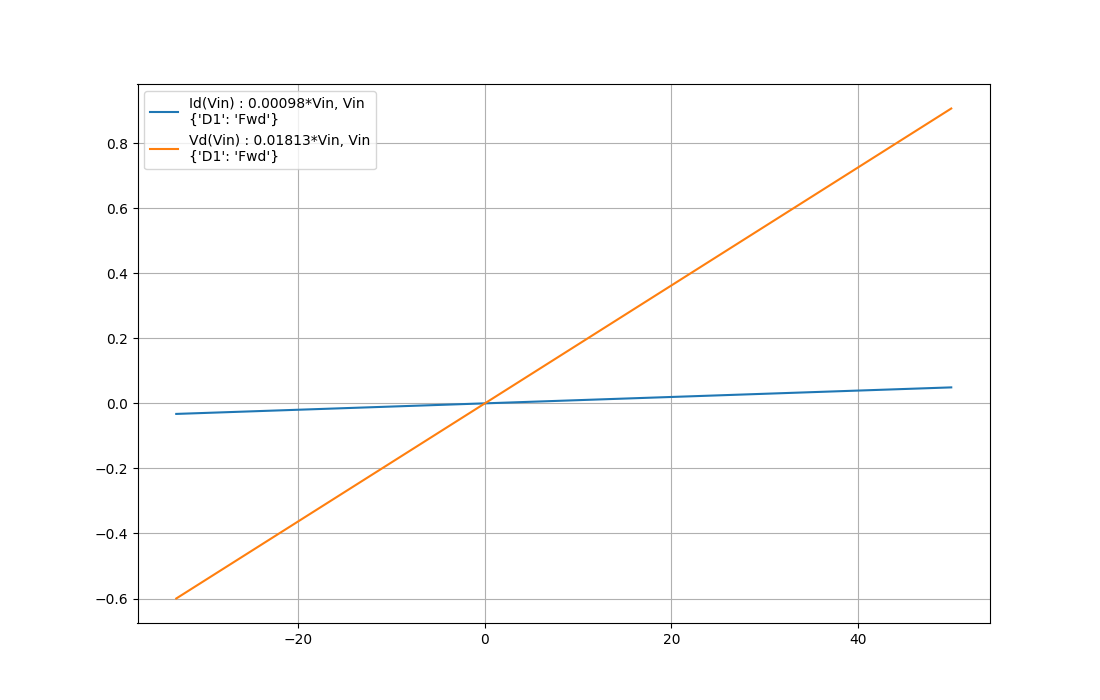

In [11]:
measurments =   [   
                    (Vin, Id, "Id(Vin)"),
                    (Vin, Vd, "Vd(Vin)"),
                    #(lambda sol : Uc.subs(sol), "Uc"),
                ]

fig, ax = plt.subplots(figsize=[11, 7])

plotMeasurments(model, -50, 50, 0.1, measurments, var)
plt.legend(loc="best");
plt.grid(True);
plt.show()